In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xbbg import blp

In [142]:
def GetRet(Liste, Start = "20150101"):
    Start = "20150101"
    End = pd.Timestamp.today().strftime("%Y%m%d")

    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101"):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())


# Using Bloomberg analysis

In [132]:
df = pd.read_csv("ESG.csv", index_col=1).iloc[:,1:]
df.iloc[:5,:]

,Environmental Vs History,Environmental Vs Peers,Social Vs History,Social Vs Peers,Governance Vs History,Governance Vs Peers
Companies,,,,,,
A UN,Better,Worse,Neutral,Neutral,Better,Worse
AAL UW,Better,Worse,Better,Neutral,Worse,Worse
AAP UN,Neutral,Neutral,Neutral,Better,Better,Neutral
AAPL UW,Worse,Better,Neutral,Neutral,Worse,Worse
ABBV UN,Better,Better,Neutral,Better,Worse,Worse


In [63]:
EnvironmentalListe = df[df.iloc[:,0] == "Better"][df.iloc[:,1] == "Better"].index
SocialListe = df[df.iloc[:,2] == "Better"][df.iloc[:,3] == "Better"].index
GovernanceListe = df[df.iloc[:,4] == "Better"][df.iloc[:,5] == "Better"].index

C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
# Getting for Each part of ESG
Environmental = GetRet(EnvironmentalListe)
Social = GetRet(SocialListe)
Governance = GetRet(GovernanceListe)

# Using S&P  as a benchmark
Bench = GetBench("SPX")

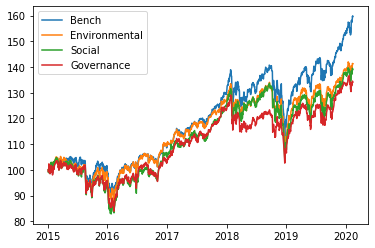

In [131]:
Plot(Bench)
Plot(Environmental)
Plot(Social)
Plot(Governance)
plt.legend(["Bench", "Environmental", "Social","Governance"])
plt.show()

# Using ESG ETF

In [161]:
# US
ESGU = GetRet(["ESGU US"], Start= "2017/01/01")
ESG = GetRet(["ESG US"], Start= "2017/01/01")
ESGV = GetRet(["ESGV US"], Start= "2017/01/01")

# Europe
ESGE = GetRet(["ESGE FP"])
EUSI = getBench("EUSI")

# Using S&P  as a benchmark
Bench = GetBench("SPX", Start= "2017/01/01")

In [164]:
# Formating

ESGU = ESGU[ESGU.index.year >= 2017]
ESG = ESG[ESG.index.year >= 2017]


[]

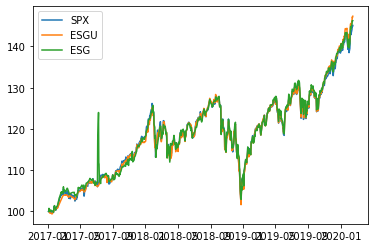

In [165]:
Plot(Bench)
Plot(ESGU)
Plot(ESG)

plt.legend(["SPX", "ESGU", "ESG"])
plt.plot()